In [1]:
from fastai2.vision.all import *

In [2]:
ls

DanceClassifier-Copy1.html   DanceClassifier.html   export.pkl
DanceClassifier-Copy1.ipynb  DanceClassifier.ipynb


In [5]:
cd ..

/notebooks


In [6]:
path = Path('dataset')
path.ls()

(#6) [Path('dataset/models'),Path('dataset/test'),Path('dataset/train'),Path('dataset/export.pkl'),Path('dataset/test.csv'),Path('dataset/train.csv')]

In [7]:
Path.BASE_PATH = path
path.ls()

(#6) [Path('models'),Path('test'),Path('train'),Path('export.pkl'),Path('test.csv'),Path('train.csv')]

In [8]:
df = pd.read_csv(path/'train.csv')

In [9]:
def get_x(r): return path/'train'/r['Image']
def get_y(r): return r['target']
dblock = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    splitter=RandomSplitter(),
    get_x = get_x,
    get_y = get_y,
    item_tfms = RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [10]:
dls = dblock.dataloaders(df)

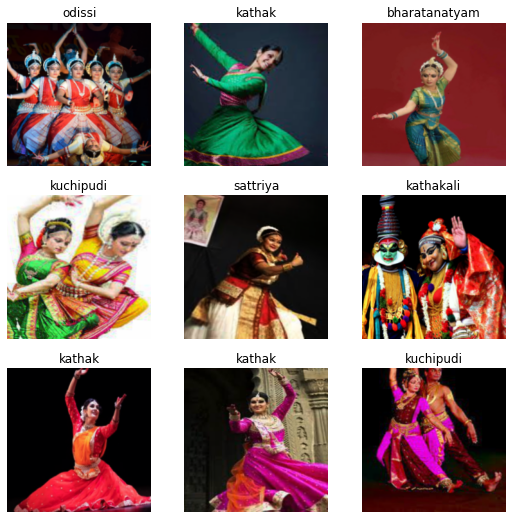

In [11]:
dls.show_batch()

## Baseline Model

In [51]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,3.369759,2.499671,0.305556,00:05


epoch,train_loss,valid_loss,accuracy,time
0,2.393367,1.886842,0.444444,00:06
1,2.073460,1.460643,0.569444,00:05


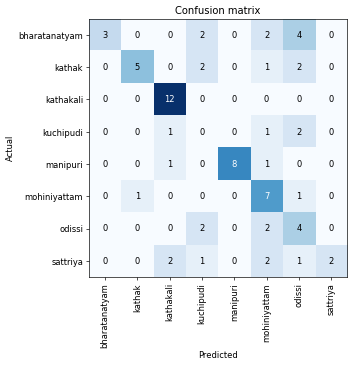

In [52]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [53]:
interp.most_confused(min_val=3)

[('bharatanatyam', 'odissi', 4)]

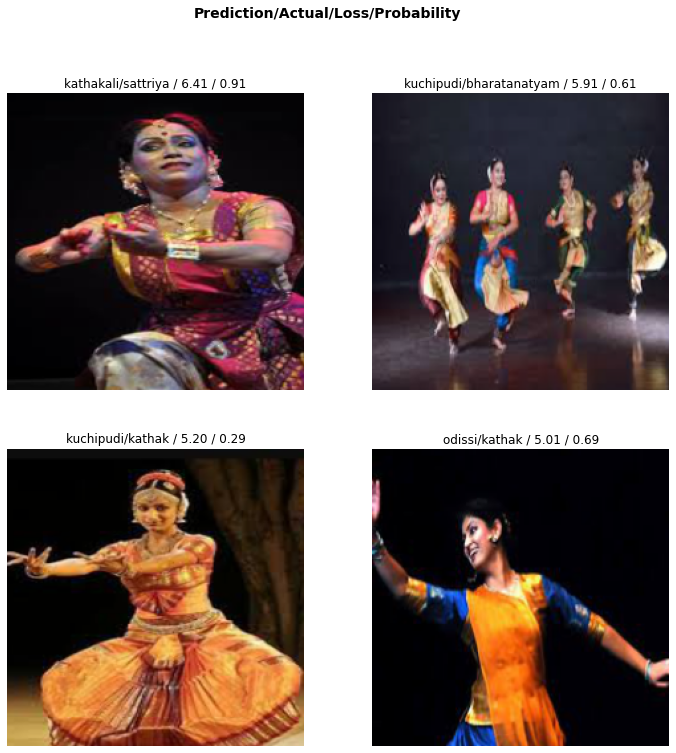

In [54]:
interp.plot_top_losses(4,nrows=2,figsize=(12,12))

(0.00043651582673192023, 6.309573450380412e-07)

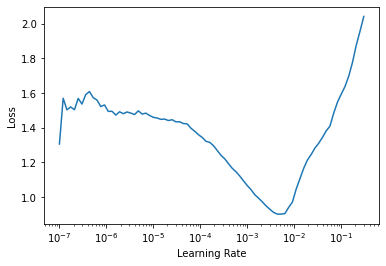

In [55]:
learn.lr_find()

In [56]:
learn = cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(3,5e-4)

epoch,train_loss,valid_loss,accuracy,time
0,3.560466,3.782239,0.152778,00:05


epoch,train_loss,valid_loss,accuracy,time
0,3.267258,2.696807,0.208333,00:06
1,3.065323,1.997120,0.375000,00:06
2,2.826797,1.755534,0.430556,00:06


In [57]:
learn.unfreeze()

(0.0006309573538601399, 3.019951861915615e-07)

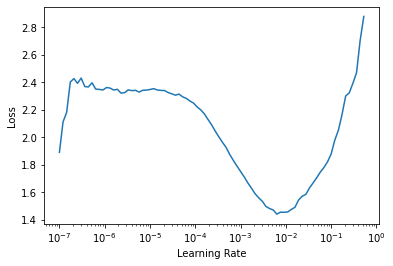

In [58]:
learn.lr_find()

In [59]:
learn.fit_one_cycle(6, lr_max=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,2.596875,1.635896,0.444444,00:06
1,2.359814,1.421127,0.486111,00:06
2,2.162801,1.210002,0.569444,00:06
3,1.946269,1.066840,0.597222,00:06
4,1.743819,1.017239,0.638889,00:06
5,1.617034,0.995027,0.638889,00:06


**Discriminative Learning Rates**

In [60]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fit_one_cycle(3, 1e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,3.356995,2.673765,0.138889,00:05
1,2.927810,1.666918,0.375000,00:05
2,2.594781,1.417010,0.472222,00:05


epoch,train_loss,valid_loss,accuracy,time
0,1.746192,1.357577,0.541667,00:06
1,1.730913,1.314370,0.569444,00:06
2,1.728263,1.273993,0.569444,00:06
3,1.682240,1.221523,0.611111,00:05
4,1.689333,1.193016,0.625000,00:06
5,1.627523,1.164529,0.666667,00:06
6,1.597060,1.148829,0.666667,00:06
7,1.589038,1.128608,0.680556,00:06
8,1.563766,1.115402,0.680556,00:06
9,1.533096,1.107390,0.680556,00:06


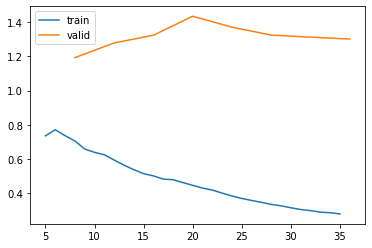

In [25]:
learn.recorder.plot_loss()

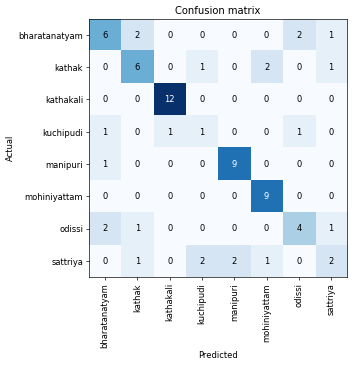

In [62]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [70]:
interp.most_confused(min_val=2)

[('bharatanatyam', 'kathak', 2),
 ('bharatanatyam', 'odissi', 2),
 ('kathak', 'mohiniyattam', 2),
 ('odissi', 'bharatanatyam', 2),
 ('sattriya', 'kuchipudi', 2),
 ('sattriya', 'manipuri', 2)]

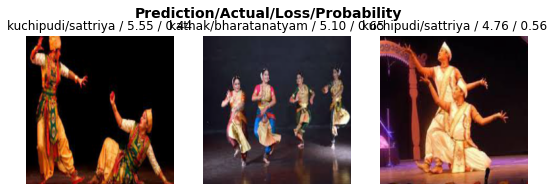

In [71]:
interp.plot_top_losses(3)

## Resnet 50

In [26]:
# from fastai2.callback.fp16 import *
# learn = cnn_learner(dls, resnet50, metrics=accuracy).to_fp16()
# learn.fine_tune(9, freeze_epochs=3)

## Saving the model

In [13]:
# learn.export()

**Prediction on Test Set**

In [14]:
# learn_inf = load_learner('dataset/export.pkl')

In [27]:
# test = pd.read_csv('dataset/test.csv')
# test.head()

In [16]:
# (path/'test').ls()

In [17]:
# img_0 = (path/'test').ls()[0]
# print(img_0)
# learn.predict(img_0)

In [19]:
# preds = [learn.predict(path/'test'/o) for o in test.Image]

In [28]:
# prediction = [preds[0] for preds in preds]
# prediction[:5]

In [29]:
# test['target'] = prediction

In [30]:
# test.head()

In [31]:
# test.to_csv('submission.csv',index=None)